In [79]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from proj1_helpers import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [80]:
## load the data
path = '../data/train.csv'
yb, input_data, ids = load_csv_data(path, sub_sample=True)

In [83]:
X = np.array([input_data[:,1],input_data[:,2]])
X = X.T
print input_data.shape
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
#fig = plt.figure(figsize=(8,10))
#ax = Axes3D(fig)
#ax.scatter(X[:,0], X[:,1], X[:,2], zdir='z', s=20, c=None, depthshade=True)

(5000, 30)


<IPython.core.display.Javascript object>

In [84]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=5000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 18


<IPython.core.display.Javascript object>


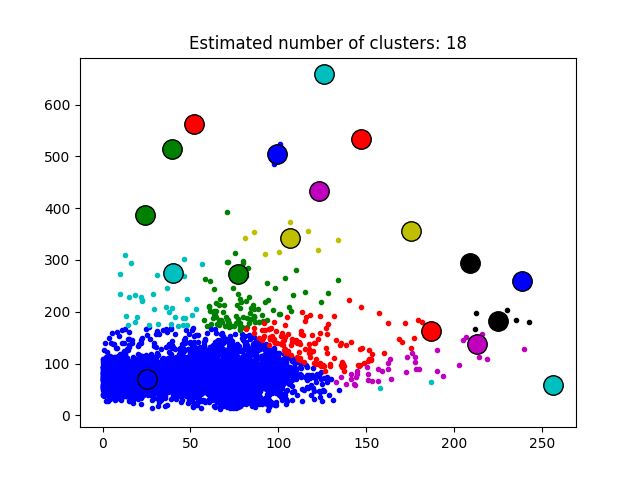

In [88]:
from itertools import cycle
plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [74]:
testx = np.array([2,3])
testy = np.array([2,4])
testz = np.array([testx,testy])
testz = testz.T
print testx.shape
print testz.shape
print testz

(2,)
(2, 2)
[[2 2]
 [3 4]]
